Hello and Welcome to the Classification part of Machine Learning module in Data-Enineer 2022/2023.

Here we are training, predicting and plotting data from gender_classification_v7.csv file.

---


The issue that we have current is as following: 


1.   I am not sure if the gender part is outputed in the tree diagram. Although the data from the list for respective columns is outputted. 


In [ ]:
#Importing Basics function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Importing Sklearn package for Clustering
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder

In [ ]:
#https://stackoverflow.com/questions/33031313/valueerror-continuous-multioutput-is-not-supported
"""

Got from the stackoverflow due to the x_train and y_train module.fit() did not work.

But i do not think that i need this part but have here as a reflection



import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV

"""

'\n\n\nimport numpy as np\nimport pandas as pd \nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.cross_validation import train_test_split\nfrom sklearn import linear_model\nfrom sklearn.grid_search import GridSearchCV\n\n'

In [ ]:
df = pd.read_csv("gender_classification_v7.csv")

df


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
#Got the idea from ChatGpt
# Create an instance of the LabelEncoder class
le = LabelEncoder()

# Fit the encoder on the "gender" column
le.fit(df['gender'])

# Transform the "gender" column into numerical values
df['gender'] = le.transform(df['gender'])

df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [ ]:
"""
#Importing the CSV file as Datasets
df = pd.read_csv("gender_classification_v7.csv")
#Chaning the String Value to integear where Male is represeted as 1 and Female as 2 
#df['gender'] = df['gender'].map({'Male': 1, 'Female': 2})
df
"""

'\n#Importing the CSV file as Datasets\ndf = pd.read_csv("gender_classification_v7.csv")\n#Chaning the String Value to integear where Male is represeted as 1 and Female as 2 \n#df[\'gender\'] = df[\'gender\'].map({\'Male\': 1, \'Female\': 2})\ndf\n'

In [ ]:
#Choosing the first 6 Rows
features=df.iloc[[0,1,2,3,4,5,6]]
features

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1


In [ ]:
#Choosing the intresteing Columns 
features=df[['long_hair','forehead_width_cm','forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]
features

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [ ]:
#Setting the X and Y values
# Choosing the from 0 to 6 and y 0 to 7 

X = df.values[:,0:6]
y = df.values[:, -1]

In [ ]:
X

array([[ 1. , 11.8,  6.1,  1. ,  0. ,  1. ],
       [ 0. , 14. ,  5.4,  0. ,  0. ,  1. ],
       [ 0. , 11.8,  6.3,  1. ,  1. ,  1. ],
       ...,
       [ 1. , 12.9,  5.7,  0. ,  0. ,  0. ],
       [ 1. , 13.2,  6.2,  0. ,  0. ,  0. ],
       [ 1. , 15.4,  5.4,  1. ,  1. ,  1. ]])

In [ ]:
y

array([1., 0., 1., ..., 0., 0., 1.])

In [ ]:
#Training
#The Train_test_split is not properly working(Solution: Import train_test_split with sklearn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)



In [ ]:
clf_ent = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=5, min_samples_leaf=5)


In [ ]:
#Issue: Unknown Error 
#Need to Encode here
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# https://www.educative.io/blog/one-hot-encoding

clf_ent.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [ ]:
y_pred = clf_ent.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 1., 1.])

In [ ]:
feature_names=features.columns

feature_names

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object')

In [ ]:
class_names=df.gender

class_names

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

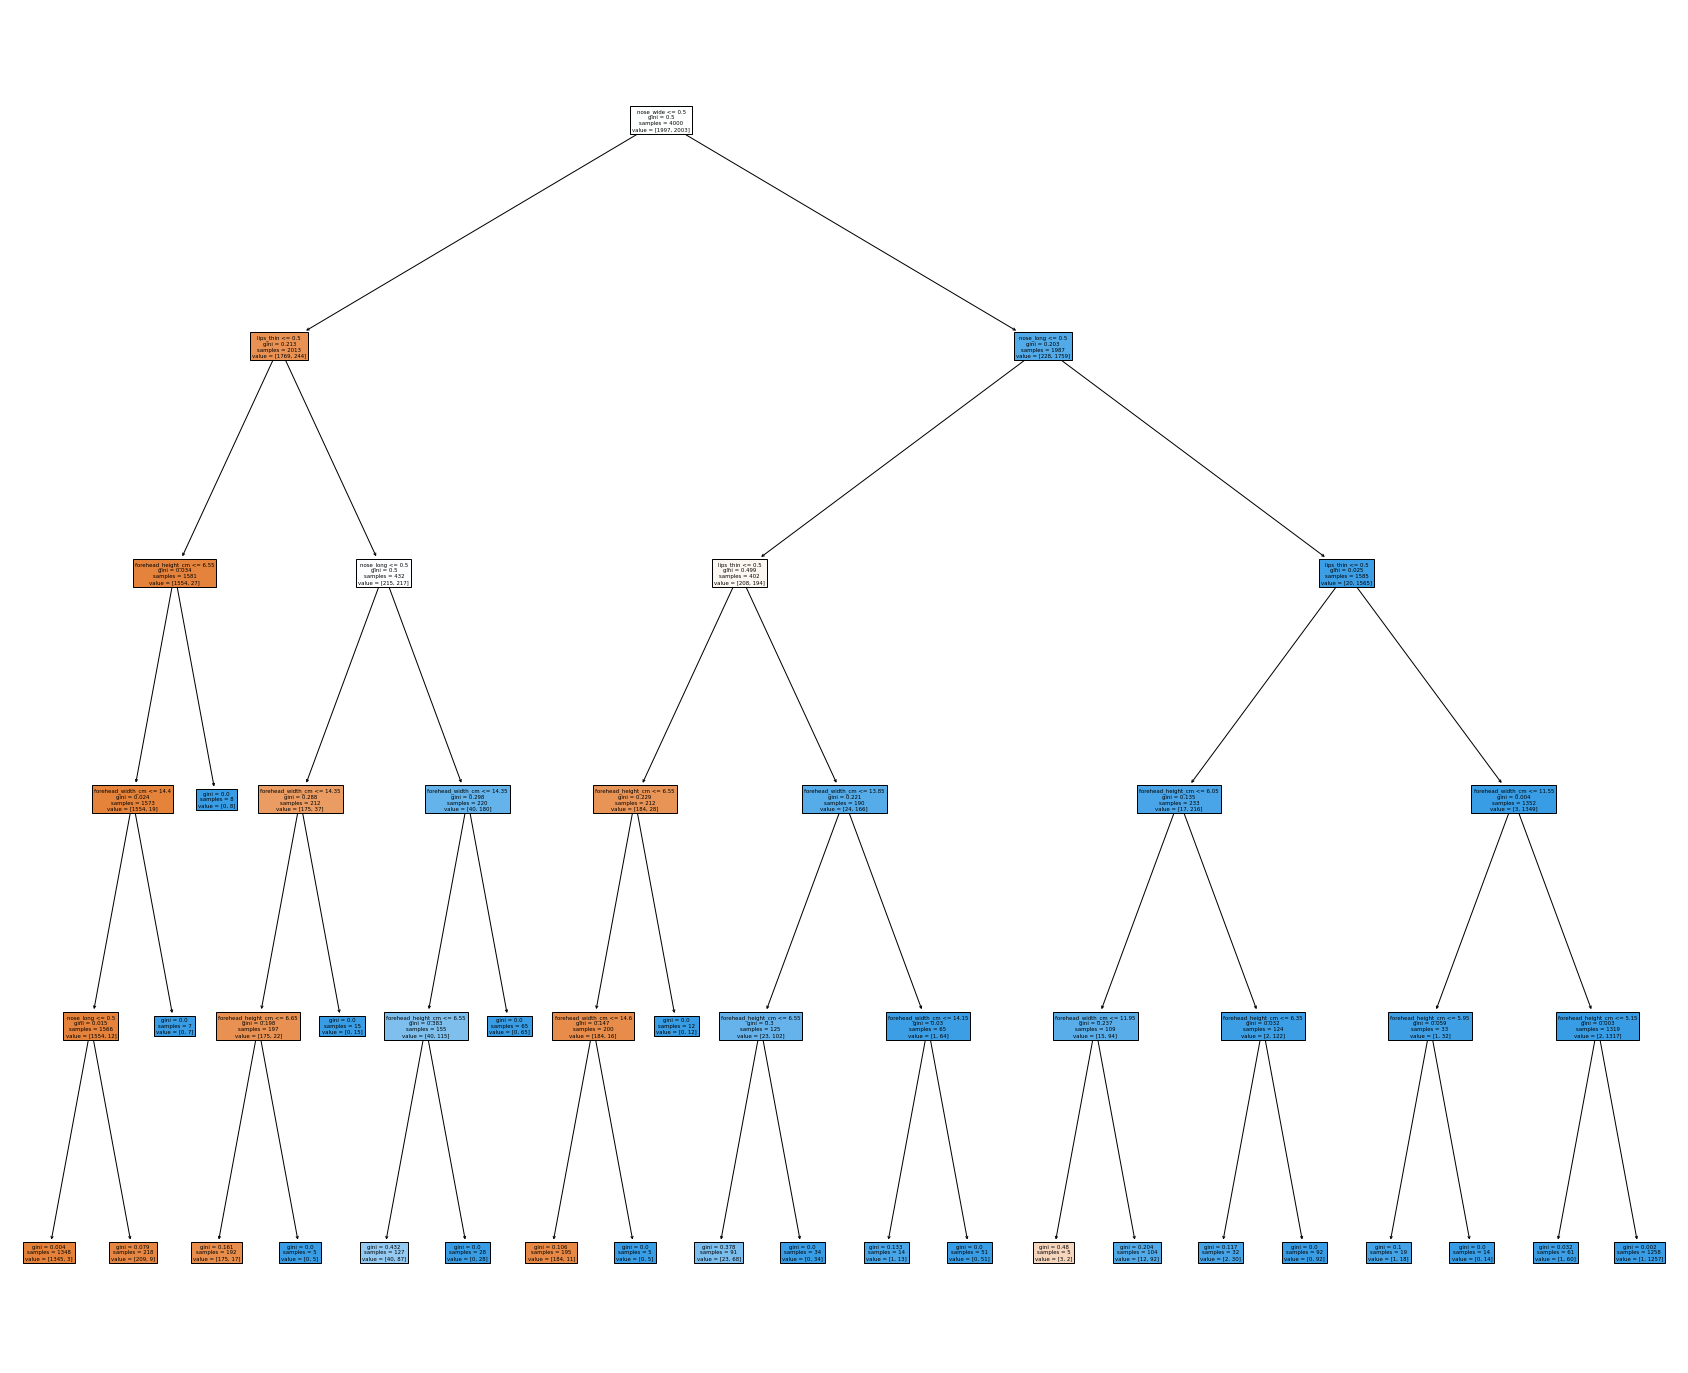

In [ ]:
#Issue: can only concatenate str (not "numpy.int64") to str | Solution: removed class_names=df.gender
# Comment to myself: I think that i may doing something wrong here, the goal is to output male and female as a binary in the decesion tree.


fig= plt.figure(figsize=(30,25))
#tree.plot_tree(clf_ent,feature_names=features.columns,class_names=df.gender,filled=True)
tree.plot_tree(clf_ent,feature_names=features.columns,filled=True)


plt.show()